In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [67]:
data=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding="ISO-8859-1")
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [68]:
data=data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [75]:
data=data.drop_duplicates()
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


<Axes: xlabel='v1'>

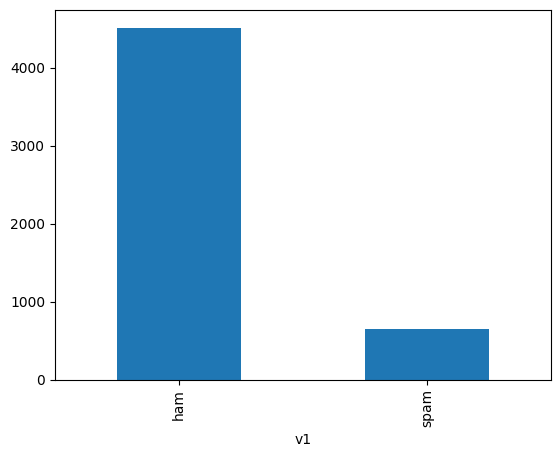

In [71]:
data['v1'].value_counts().plot(kind='bar')


In [72]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['v1']= label_encoder.fit_transform(data['v1'])

data

/tmp/ipykernel_31/1919458258.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['v1']= label_encoder.fit_transform(data['v1'])


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [86]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(data['v2'],data['v1'],test_size=0.2,random_state=40)

"5566    REMINDER FROM O2: To get 2.50 pounds free call...\n4131    Hi baby ive just got back from work and i was ...\n2312    tddnewsletter@emc1.co.uk (More games from TheD...\n455       Si si. I think ill go make those oreo truffles.\n3       U dun say so early hor... U c already then say...\n                              ...                        \n3828             Sure, I'll see if I can come by in a bit\n5066    83039 62735=å£450 UK Break AccommodationVouche...\n3539    I'll get there at 3, unless you guys want me t...\n3236    Ron say fri leh. N he said ding tai feng cant ...\n3601       Cps is causing the outages to conserve energy.\nName: v2, Length: 4135, dtype: object"

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
v=TfidfVectorizer( lowercase=False)
train_x1 = v.fit_transform(train_x)
test_x1 =  v.transform(test_x)

Model Score on Training data 0.9719467956469166
Model Score on Testing data 0.9622823984526112
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       955
           1       0.67      1.00      0.80        79

    accuracy                           0.96      1034
   macro avg       0.83      0.98      0.89      1034
weighted avg       0.97      0.96      0.97      1034



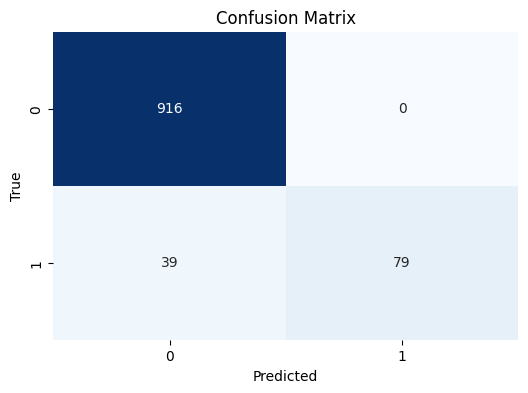

In [90]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
mnb= MultinomialNB()
mnb.fit(train_x1 ,train_y)
print("Model Score on Training data",mnb.score(train_x1 ,train_y))
print("Model Score on Testing data",mnb.score(test_x1 ,test_y))
y_pred = mnb.predict(test_x1)

print(classification_report(y_pred ,test_y))

cm = confusion_matrix(test_y, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Model Score on Training data 0.9666263603385732
Model Score on Testing data 0.965183752417795
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       952
           1       0.69      1.00      0.82        82

    accuracy                           0.97      1034
   macro avg       0.85      0.98      0.90      1034
weighted avg       0.98      0.97      0.97      1034



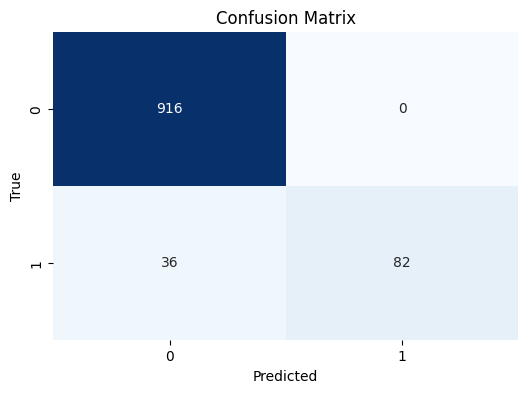

In [93]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_x1 ,train_y)
print("Model Score on Training data",lr.score(train_x1 ,train_y))
print("Model Score on Testing data",lr.score(test_x1 ,test_y))
y_pred = lr.predict(test_x1)

print(classification_report(y_pred ,test_y))

cm = confusion_matrix(test_y, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Model Score on Training data 0.9995163240628778
Model Score on Testing data 0.9922630560928434
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       924
           1       0.93      1.00      0.96       110

    accuracy                           0.99      1034
   macro avg       0.97      1.00      0.98      1034
weighted avg       0.99      0.99      0.99      1034



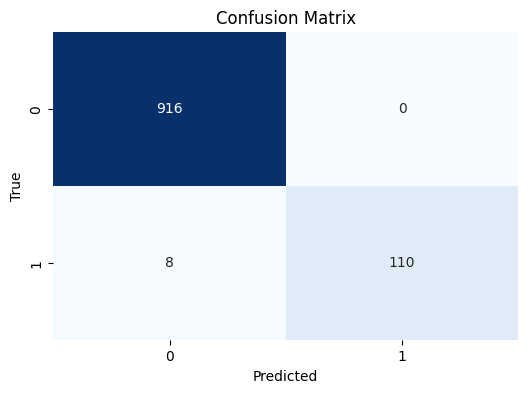

In [94]:
from sklearn.svm import LinearSVC
svm=LinearSVC()
svm.fit(train_x1 ,train_y)
print("Model Score on Training data",svm.score(train_x1 ,train_y))
print("Model Score on Testing data",svm.score(test_x1 ,test_y))
y_pred = svm.predict(test_x1)

print(classification_report(y_pred ,test_y))

cm = confusion_matrix(test_y, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()